<a href="https://colab.research.google.com/github/sathizz7/Guvi_Task7/blob/main/_KNN_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

**Importing the dataset**

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
labelen = LabelEncoder()
df['Gender'] = labelen.fit_transform(df['Gender'])

In [6]:
df.drop('Gender', axis= 1, inplace = True)

**Splitting the dataset into the Training set and Test set**

In [7]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [8]:
Xtrain,Xtest, ytrain,ytest = train_test_split(X,y,test_size = 0.2)

**Feature Scaling**

In [9]:
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

**Fitting K-NN to the Training set**

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier()
knn.fit(Xtrain,ytrain)

KNeighborsClassifier()

**Predicting the Test set results**

In [13]:
ypred = knn.predict(Xtest)

**Making the Confusion Matrix**

In [14]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, plot_roc_curve, accuracy_score

In [15]:
confusion_matrix(ytest, ypred)

array([[43,  2],
       [ 4, 31]])

In [17]:
accuracy_score(ytest, ypred)

0.925

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


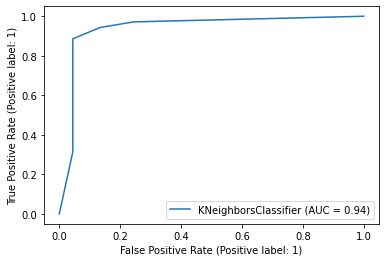

In [18]:
plot_roc_curve(knn, Xtest,ytest)